# Building a simple neural-network with Pytorch


This is a simple quick-start in performing digit recognition in a neural network in Pytorch. It is strongly encouraged to create a new environment for this exercise.

```
conda create -n torch_mnist python=3.9
conda activate torch_mnist
conda install pytorch torchvision cudatoolkit=11.6 -c pytorch -c conda-forge
```

*Note*: This will not work for every platform. Look up the [pytorch](https://pytorch.org/get-started/locally/) to find the correct configuration for your platform (you may have to work on the CPU if your PC has no NVIDIA graphics card)

[Notebook source](https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=755c9927bf72cc7da3f926bab5a96e61e4478eb0&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f5a6161626f6e2f4437303436452d4578657263697365732f373535633939323762663732636337646133663932366261623561393665363165343437386562302f4578657263697365312e6970796e62&logged_in=false&nwo=Zaabon%2FD7046E-Exercises&path=Exercise1.ipynb&platform=android&repository_id=220219243&repository_type=Repository&version=99)

## Time to build a neural network!
First let's import some prerequisites

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

print("Yes!? Python works alright :-)")

Yes!? Python works alright :-)


## Load training data

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw



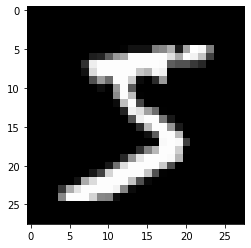

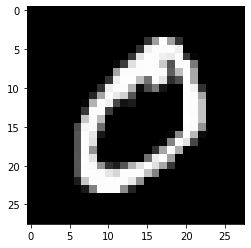

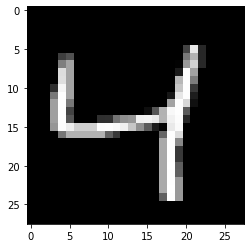

In [3]:
mnist_data = datasets.MNIST('./', train=True, download=True, transform=transforms.ToTensor())

mnist_loader = DataLoader(mnist_data, batch_size=1000, shuffle=False)

def plot_digit(data):
    # Transfrom the images into an appropriate shape for displaying
    data = data.view(28,28)
    plt.imshow(data, cmap='gray')
    plt.show()
    
images, labels = next(iter(mnist_loader))

for idx in range(3):
    plot_digit(images[idx])

In [4]:
# This code initializes the neural network

### EDIT CODE BELOW TO CHANGE THE NETWORK AND ITS OPTIMIZING PROCEDURE ###
# nn.Sequential can be given a list of neural networks modules

# This initial network has only one single linear layer.
# It has an input size equal to the size of the images (28x28 pixels = 784)
# and an output size equal to the number of classes (the number of digits = 10)
network = nn.Sequential(
    nn.Linear(784, 784),
    nn.ReLU(),
    nn.Linear(784, 784),
    nn.ReLU(),
    nn.Linear(784, 784),
    nn.ReLU(),
    nn.Linear(784, 10)
)

## Config
In addition to changing optimizer you can try to change other parameters like learning rate (lr)

In [5]:
optimizer = optim.SGD(network.parameters(), lr=0.15)

# Initialize the loss function
loss_function = nn.MSELoss()

An Embedding layer used for turning int into one-hot (0 -> [1,0,0,0,0,0,0,0,0,0], 5 -> [0,0,0,0,0,1,0,0,0,0])

In [6]:
to_onehot = nn.Embedding(10, 10) 
to_onehot.weight.data = torch.eye(10)

The `Dataset` class is central to working with Pytorch. It provides a way to quickly access all data in your training/validation/test sets (see [documentation](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)). We can index it like normal arrays to retrieve the data in our datasets:

In [24]:
mnist_data[0][1]

AttributeError: 'int' object has no attribute 'shape'

In [9]:
# Extract some images from the dataset and have the new predict what digit they are
def predict_on_images(iterator, images_to_show):
    success=0
    for index in range(images_to_show):
        # Get the next batch of images
        images, labels = next(iterator)

        #plot_digit(images[0])

        # Transform the images into a single list of pixels since our network takes that as its input
        input_tensor = images[0].view(1,784)
        # Run the input through our network to get a prediction
        prediction = network(input_tensor)
        # Extract which prediction had the highest probability
        guess = torch.argmax(prediction[0], dim=-1)
        # Show the predicted digit and the actual digit
        print('Prediction:', guess.item(), "- Actual:", labels[0].item())
        if guess.item()==labels[0].item():
            success+=1
    print("Success rate is ", success, " on ", images_to_show)

# Have the untrained network predict on some images
predict_on_images(iterator = iter(mnist_loader), images_to_show = 3)

## Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [10]:
# Decide the number of epochs to train for (one epoch is one optimization iteration on the entire dataset)
epochs = 30

# For each epoch
for epoch in range(epochs):
    
    # For each batch
    for batch_nr, (images, labels) in enumerate(mnist_loader):
        
        # Extract the labels and turn them into one-hot representation (note: not all loss functions needs this)
        labels = to_onehot(labels)
        
        # Reshape the images to a single vector (28*28 = 784)
        images = images.view(-1,784)
        
        # Predict for each digit in the batch whatclass they belong to
        prediction = network(images)
        
        # Calculate the loss of the prediction by comparing to the expected output
        loss = loss_function(prediction, labels)
        
        # Backpropagate the loss through the network to find the gradients of all parameters
        loss.backward()
        
        # Update the parameters along their gradients
        optimizer.step()
        
        # Clear stored gradient values
        optimizer.zero_grad()
        
        #Print the epoch, batch, and loss
        print(
            '\rEpoch {} [{}/{}] - Loss: {}'.format(
                epoch+1, batch_nr+1, len(mnist_loader), loss
            ),
            end=''
        )

Epoch 30 [60/60] - Loss: 0.015950569882988937

In [11]:
# Have the trained network predict on a number of images
predict_on_images(iterator = iter(mnist_loader), images_to_show = 50)

Prediction: 5 - Actual: 5
Prediction: 0 - Actual: 0
Prediction: 5 - Actual: 5
Prediction: 9 - Actual: 9
Prediction: 7 - Actual: 7
Prediction: 7 - Actual: 7
Prediction: 6 - Actual: 6
Prediction: 8 - Actual: 8
Prediction: 0 - Actual: 0
Prediction: 6 - Actual: 6
Prediction: 3 - Actual: 3
Prediction: 6 - Actual: 6
Prediction: 7 - Actual: 7
Prediction: 7 - Actual: 7
Prediction: 1 - Actual: 1
Prediction: 5 - Actual: 5
Prediction: 8 - Actual: 8
Prediction: 3 - Actual: 3
Prediction: 4 - Actual: 4
Prediction: 8 - Actual: 8
Prediction: 5 - Actual: 5
Prediction: 7 - Actual: 7
Prediction: 3 - Actual: 3
Prediction: 7 - Actual: 7
Prediction: 8 - Actual: 8
Prediction: 7 - Actual: 3
Prediction: 4 - Actual: 4
Prediction: 5 - Actual: 5
Prediction: 1 - Actual: 1
Prediction: 2 - Actual: 2
Prediction: 3 - Actual: 3
Prediction: 5 - Actual: 6
Prediction: 8 - Actual: 8
Prediction: 3 - Actual: 3
Prediction: 4 - Actual: 4
Prediction: 1 - Actual: 1
Prediction: 9 - Actual: 9
Prediction: 4 - Actual: 4
Prediction: 